In [7]:
!pip install tensorflow
!pip install scikit-learn

In [6]:

!pip install --upgrade tensorflow



In [5]:
!pip install tensorflow-image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandas


In [4]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [8]:
from IPython.display import clear_output


In [9]:
import warnings
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import pandas as pd  # Importa la biblioteca pandas
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('INFO')

# Cargamos el conjunto de datos
df = pd.read_csv('/content/drive/My Drive/Coffe/Coffee Bean.csv')
df


,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train
...,...,...,...,...
1595,3,test/Medium/medium (95).png,Medium,test
1596,3,test/Medium/medium (96).png,Medium,test
1597,3,test/Medium/medium (97).png,Medium,test
1598,3,test/Medium/medium (98).png,Medium,test


In [10]:
#setting up the trianing dir
data_dir = '/content/drive/My Drive/Coffe/train'
image_exts = ['.png']
#create an image dataset with the given images
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1205 files belonging to 4 classes.


In [11]:
#itertaor for image iteration
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

clear_output()

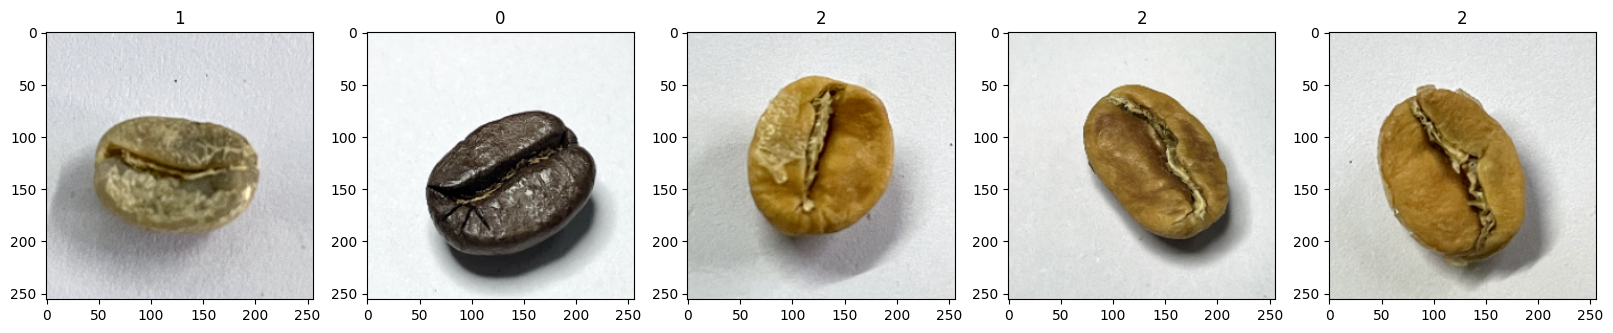

In [12]:
#Visualise a random batch
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Epoch 1/30
31/31 [==============================] - 8s 233ms/step - loss: 1.0109 - accuracy: 0.5591 - val_loss: 0.5637 - val_accuracy: 0.7137
Epoch 2/30
31/31 [==============================] - 6s 193ms/step - loss: 0.3075 - accuracy: 0.8828 - val_loss: 0.1692 - val_accuracy: 0.9461
Epoch 3/30
31/31 [==============================] - 4s 140ms/step - loss: 0.2190 - accuracy: 0.9098 - val_loss: 0.0868 - val_accuracy: 0.9876
Epoch 4/30
31/31 [==============================] - 8s 272ms/step - loss: 0.1107 - accuracy: 0.9658 - val_loss: 0.0777 - val_accuracy: 0.9793
Epoch 5/30
31/31 [==============================] - 6s 186ms/step - loss: 0.0676 - accuracy: 0.9782 - val_loss: 0.0443 - val_accuracy: 0.9917
Epoch 6/30
31/31 [==============================] - 3s 92ms/step - loss: 0.0951 - accuracy: 0.9658 - val_loss: 0.0374 - val_accuracy: 0.9917
Epoch 7/30
31/31 [==============================] - 3s 96ms/step - loss: 0.0571 - accuracy: 0.9793 - val_loss: 0.0346 - val_accuracy: 0.9917
Epoch 8/

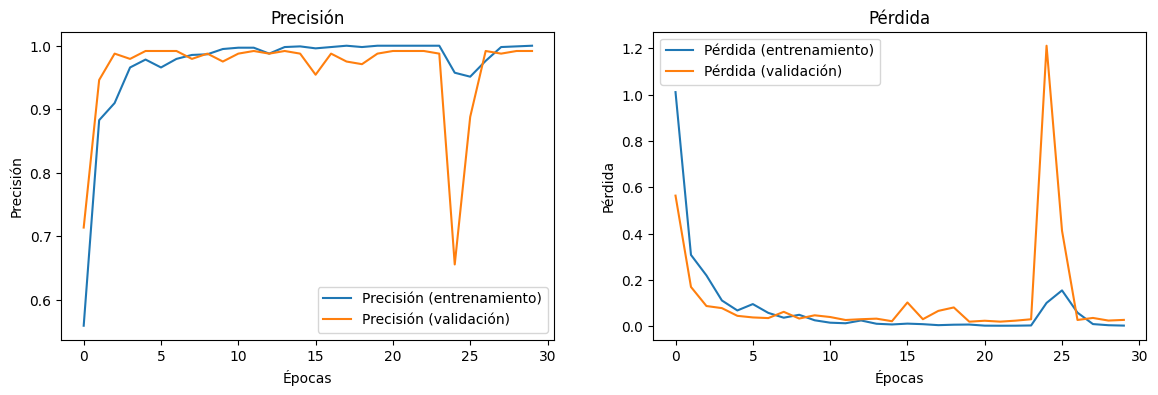

8/8 [==============================] - 0s 42ms/step


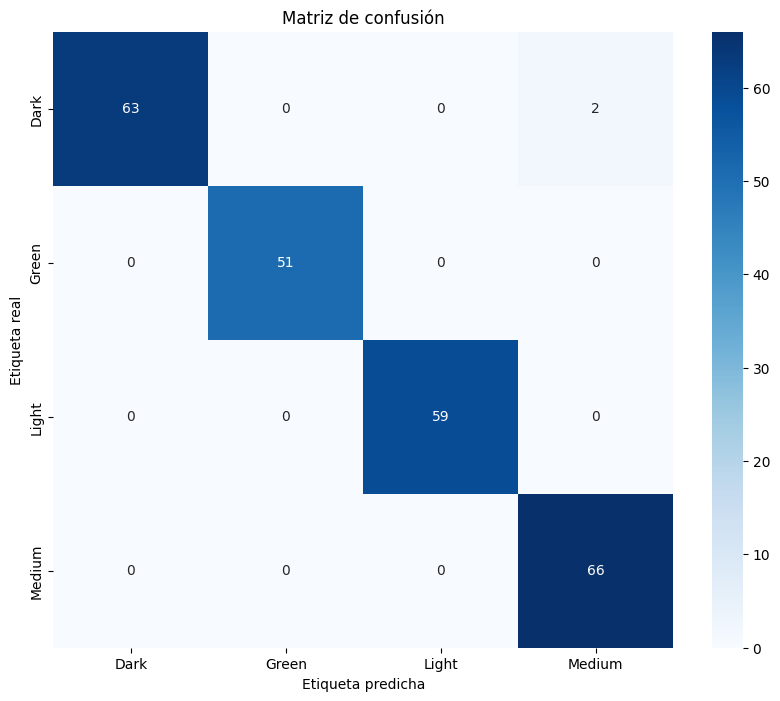

Informe de clasificación:
              precision    recall  f1-score   support

        Dark       1.00      0.97      0.98        65
       Green       1.00      1.00      1.00        51
       Light       1.00      1.00      1.00        59
      Medium       0.97      1.00      0.99        66

    accuracy                           0.99       241
   macro avg       0.99      0.99      0.99       241
weighted avg       0.99      0.99      0.99       241



In [14]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Configuración de parámetros
IMG_SIZE = 50
DATADIR = '/content/drive/My Drive/Coffe/train'
CATEGORIES = ['Dark', 'Green', 'Light', 'Medium']

# Crear datos de entrenamiento
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

# Mezclar los datos de entrenamiento
random.shuffle(training_data)

# Separar en características (X) y etiquetas (y)
X = []  # features
y = []  # labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.asarray(y)

# Normalizar las imágenes
X = X / 255.0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Visualización de las métricas de precisión y pérdida
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# Evaluación del modelo y predicciones
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)  # Convertimos las predicciones de one-hot a etiquetas

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title('Matriz de confusión')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

# Informe de clasificación
print('Informe de clasificación:')
class_labels = CATEGORIES  # Usamos las etiquetas definidas anteriormente
report = classification_report(y_test, y_pred, target_names=class_labels)
print(report)


1/1 [==============================] - 0s 118ms/step


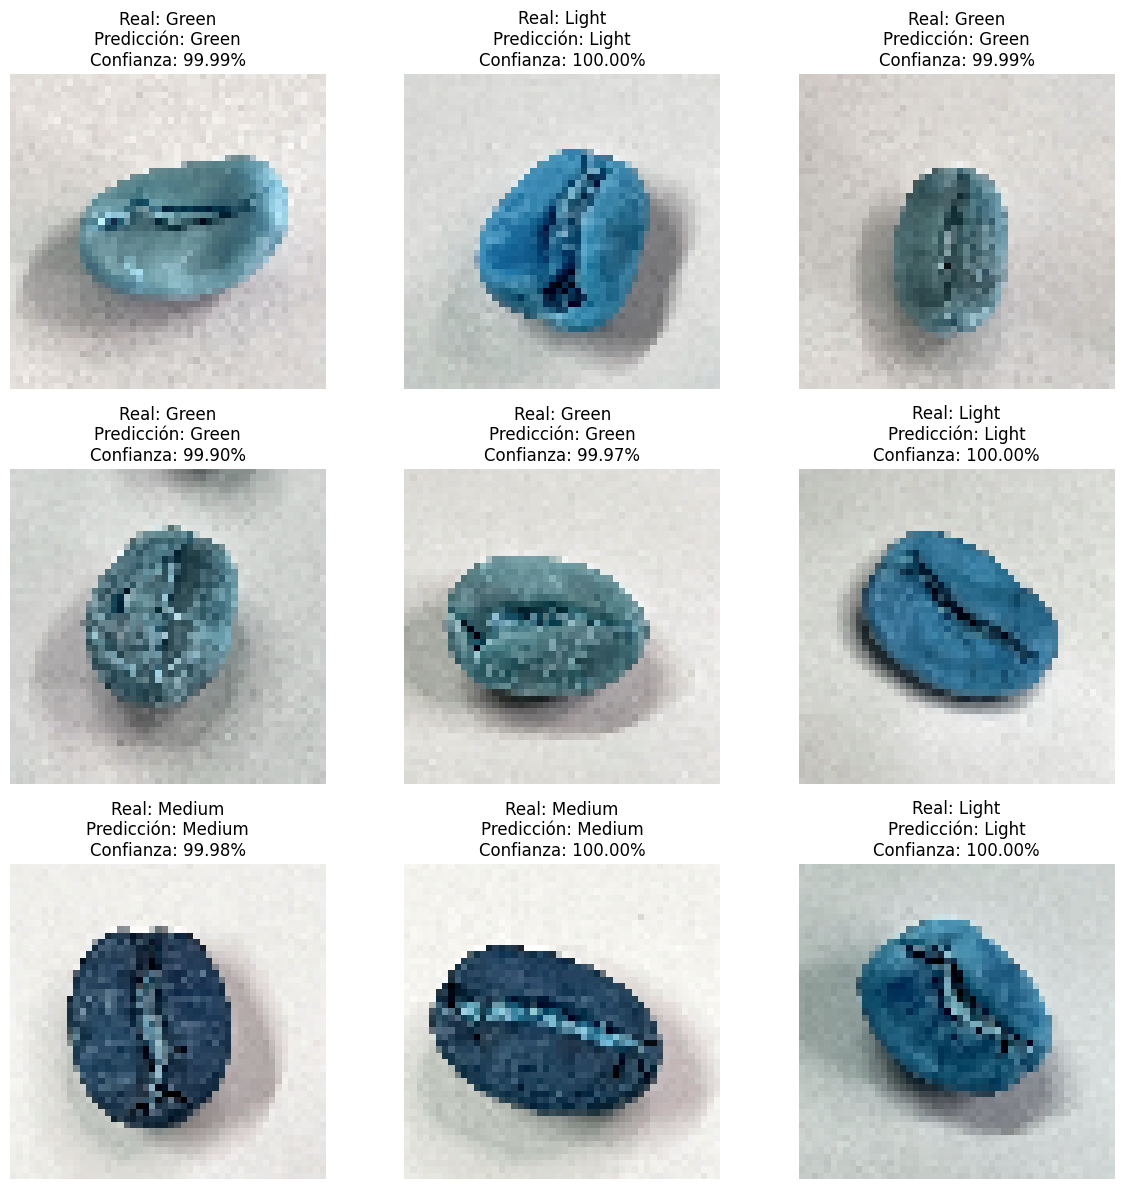

In [16]:
# Seleccionar 9 muestras aleatorias del conjunto de prueba
random_indices = random.sample(range(len(X_test)), 9)

plt.figure(figsize=(12, 12))
for i, index in enumerate(random_indices, 1):
    plt.subplot(3, 3, i)

    # Preparar la imagen para la predicción
    sample_image = X_test[index].reshape(1, IMG_SIZE, IMG_SIZE, 3)

    # Realizar la predicción
    prediction = model.predict(sample_image)
    predicted_label = CATEGORIES[np.argmax(prediction)]

    # Calcular el porcentaje de acierto
    confidence = np.max(prediction) * 100

    # Visualizar la imagen con el resultado de la predicción
    plt.imshow(sample_image.reshape(IMG_SIZE, IMG_SIZE, 3))
    plt.title(f"Real: {CATEGORIES[y_test[index]]}\nPredicción: {predicted_label}\nConfianza: {confidence:.2f}%")
    plt.axis('off')

plt.tight_layout()
plt.show()
